C:\Users\gulam\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Iteration 1, loss = 0.42473059
Iteration 2, loss = 0.19824993
Iteration 3, loss = 0.14820670
Iteration 4, loss = 0.11724433
Iteration 5, loss = 0.09662182
Iteration 6, loss = 0.08035723
Iteration 7, loss = 0.06790252
Iteration 8, loss = 0.05895092
Iteration 9, loss = 0.05065377
Iteration 10, loss = 0.04440961

Test accuracy: 0.9717142857142858


C:\Users\gulam\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


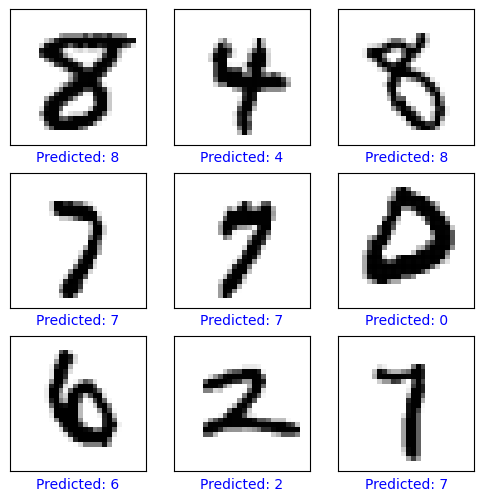

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

# Normalize and split the dataset
X = X / 255.0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the neural network model
model = MLPClassifier(hidden_layer_sizes=(128,), activation='relu', solver='adam',
                      max_iter=10, random_state=42, verbose=True)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'\nTest accuracy: {accuracy}')

# Function to plot image and prediction
def plot_image(i, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img.reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(f"Predicted: {y_pred[i]}", color='blue')

# Display sample predictions
num_rows, num_cols = 3, 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plot_image(i, y_test[i], X_test[i])
plt.show()
